# This notebook is for course two (IBM) : Data understanding and Preparation  


## Importing Data Files

In [2]:
#Import Product DataSet here
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c319603c49e94d278c98731341cdc5de = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oAZZSJ9HPNrxeyHkt4wpHCCAnq8EilD5bf4o8M0CitX6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

body = client_c319603c49e94d278c98731341cdc5de.get_object(Bucket='project1-donotdelete-pr-wvqa4jyen8nqha',Key='Product Data Set - Student 2 of 3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

product_data=pd.read_csv(body,sep='|')
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [3]:
#Import Transaction DataSet Here
body = client_c319603c49e94d278c98731341cdc5de.get_object(Bucket='project1-donotdelete-pr-wvqa4jyen8nqha',Key='Transaction Data Set - Student 3 of 3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

transaction_data = pd.read_csv(body,sep='|')
transaction_data.head()


,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [4]:
#Import Customer Dataset Here
body = client_c319603c49e94d278c98731341cdc5de.get_object(Bucket='project1-donotdelete-pr-wvqa4jyen8nqha',Key='Customer Data Set - Student 1 of 3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

    
customer_data = pd.read_csv(body)
customer_data.head()


,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


# Quick Data Exploration

Discover the number of records in each file

In [5]:
product_data.shape

(30, 3)

In [6]:
transaction_data.shape

(10000, 6)

In [7]:
customer_data.shape

(500, 9)

###### We can conclude from the above that Retailer X sells 30 products and served 500 customers in a total of 10,000 recorded transactions. 

Verify that the files were read into a Pandas data frame.

In [8]:
type(customer_data)

pandas.core.frame.DataFrame

In [9]:
type(customer_data.AGE)

pandas.core.series.Series

This output indicates that a column "AGE" on its own is a Pandas series.

Columns data types

In [10]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

Remove the $ sign from INCOME 

In [11]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))

In [12]:
customer_data.head(2)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"94,475",9,notenrolled,NaN,6,Married


Convert INCOME column to integer type

In [13]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

In [14]:
customer_data.head(2)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single
1,10002,0,42,94475,9,notenrolled,NaN,6,Married


In [15]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

Now running the “dtypes” method reveals that data type conversion of INCOME was successful 

Gather some statics

In [16]:
customer_data["MARITAL STATUS"].describe()

count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

In [17]:
customer_data["INCOME"].describe()

count       500.000000
mean      85792.482000
std       37157.766304
min       20256.000000
25%       52429.000000
50%       86846.500000
75%      118381.000000
max      149999.000000
Name: INCOME, dtype: float64

Unique values in "MARITAL STATUS" column

In [18]:
customer_data["MARITAL STATUS"].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

Change the data type of "ENROLLMENT DATE" column from object to a datetime object.

In [19]:
from datetime import datetime
customer_data['ENROLLMENT DATE']=\
customer_data['ENROLLMENT DATE'][customer_data['ENROLLMENT DATE'].notnull()].map(lambda x :datetime.strptime(x, '%d-%m-%Y') )

In [20]:
customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

## Data Quality
Data used in this tutorial is mostly free from data quality issues, however in real life, data scientists deal with data sets that needs to be cleaned and corrected for their quality issues

In [21]:
print('null values for transactoin ?',transaction_data.isnull().values.any())
print('null values for products ?',product_data.isnull().values.any())
print('null values for customers ?',customer_data.isnull().values.any())

null values for transactoin ? False
null values for products ? False
null values for customers ? True


In [22]:
customer_data.columns[customer_data.isna().any()].tolist()

['ENROLLMENT DATE']

It turned out that ENROLMENT DATE is the only column which has null values. 
The reasons behind is that not all customers are enrolled to loyalty and hence there is no enrolment date

# Analysis of the distribution of variables using graphs 

In [23]:
import matplotlib.pyplot as plt


### Univariate Analysis (Single variable analysis)

To know the relative proporation of married customers th those who are not married.

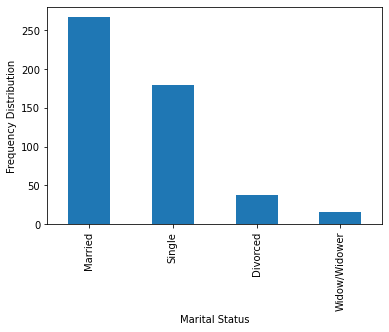

In [24]:
customer_data['MARITAL STATUS'].value_counts().plot(kind='bar')
plt.xlabel("Marital Status")
plt.ylabel("Frequency Distribution")
plt.show()

More than half of Retailer X customer base are married people, this might affect their choice of products and affect their overall spending.

Let us look at the customers age distribution.

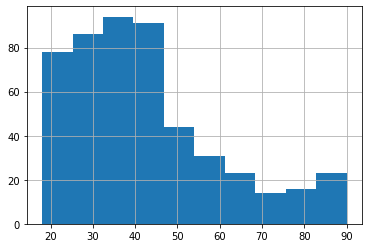

In [25]:
customer_data['AGE'].hist(bins=10)  
plt.show()

Draw a box plot for the age and show how this variable is dispersed.

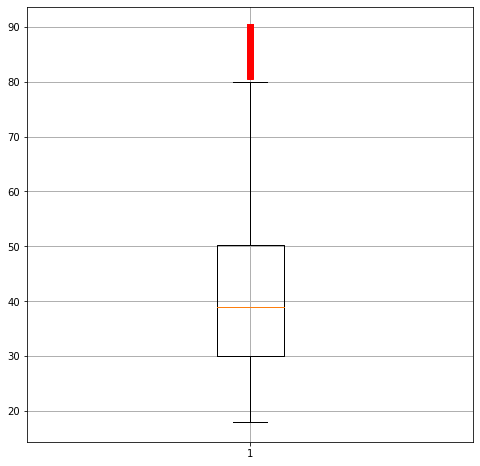

In [26]:
plt.figure(figsize=(8,8))
plt.boxplot(customer_data.AGE,0,'rs',1)
plt.grid(linestyle='-',linewidth=1)
plt.show()

The AGE variable summary statics.

In [27]:
customer_data['AGE'].describe()

count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

## Creating a Customer view

### There are two important objectives that were set during the Business Understanding phase :
1- Understanding the factors associated with loyalty program participation
2- Understanding the factors associated with increased spending

Money was spent buying Retailer X items, the Transaction data must be joined with Products because transaction data does not indicate the unit price of the sold products; It just refers to the product number, not the product type.

Create a Pandas frame that is called "trans_products

In [28]:
trans_products=transaction_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')

In [29]:
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,$25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,$25.46


Change the type of "UNIT LIST PRICE" column 

In [30]:
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [31]:
trans_products.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
dtype: object

Derive a total price column for each transaction

In [32]:
trans_products['Total_Price']=trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1- trans_products['DISCOUNT TAKEN'])

In [33]:
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,Total_Price
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


The revenue per product category

In [34]:
Income_by_product = trans_products.groupby('PRODUCT CATEGORY').agg({'Total_Price':'sum'}).sort_values('Total_Price',ascending=False)

In [35]:
Income_by_product

,Total_Price
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


In [36]:
Revenue_by_product=Income_by_product.rename(columns={'Total_Price':'Revenue Per Product'})

<AxesSubplot:ylabel='Revenue Per Product'>

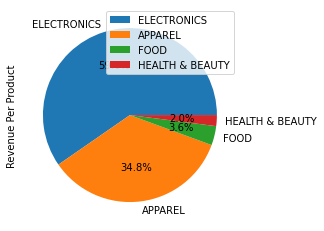

In [37]:
Revenue_by_product['Revenue Per Product'].plot(kind='pie',autopct='%1.1f%%',legend = True)

##### For each customer , we will calculate total spend ,total spend per category ,recent transaction date

### Let us calculate for each customer the following measures, and see whether any of these measures affects loyalty enrolment :

1- Total spends per category

2- Total spends 

3- Most recent transactions by date

4- Average Discount 

### Calculate the total spend per category :

In [49]:
customer_prod_categ=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})

In [50]:
customer_prod_categ.head()

Total_Price
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

In [51]:
customer_prod_categ.columns

Index(['Total_Price'], dtype='object')

Revert "Customer Num" and "Product Category" columns back

In [52]:
customer_prod_categ.reset_index().head()

,CUSTOMER NUM,PRODUCT CATEGORY,Total_Price
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


Make it permanent

In [53]:
customer_prod_categ=customer_prod_categ.reset_index()

Let us reorganize the data and create a summary report that shows the spending on each product category per customer.

In [54]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')

In [55]:
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


### Calculate Total spends and most recent transactions by date

Convert the transaction date to a datetime object.

In [56]:
trans_products['TRANSACTION DATE']=trans_products['TRANSACTION DATE'].map(lambda x :datetime.strptime(x, '%m/%d/%Y') )

In [57]:
recent_trans_total_spend=trans_products.groupby('CUSTOMER NUM').\
agg({'TRANSACTION DATE':'max','Total_Price':'sum'}). \
rename(columns={'TRANSACTION DATE':'RECENT TRANSACTION DATE','Total_Price':'TOTAL SPENT'})
recent_trans_total_spend.head()

,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,
10001,2015-12-24,6826.770
10002,2015-12-21,5062.451
10003,2015-12-31,8562.440
10004,2015-12-17,5522.694
10005,2015-12-22,213.512


In [58]:
customer_KPIs=customer_pivot.merge(recent_trans_total_spend,how='inner',left_index=True, right_index=True )

In [59]:
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
10005,213.512,NaN,NaN,NaN,2015-12-22,213.512


In [60]:
customer_KPIs=customer_KPIs.fillna(0)
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
10005,213.512,0.000,0.000,0.000,2015-12-22,213.512


In [61]:
customer_all_view=customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)

In [62]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512


## Bivariate Analysis (2-variable analysis) – Loyalty as a target variable 

#### Gender

In [63]:
table=pd.crosstab(customer_all_view['GENDER'],customer_all_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


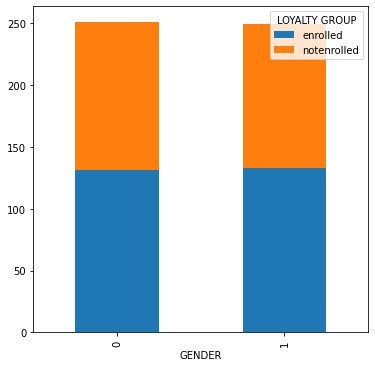

In [64]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

By visually inspecting the chart, apparently being male or female does not affect the enrollment much. The ratio of enrolled to non-enrolled is the same for both genders (which looks like 1:1). Both genders are likely to join with the same probability.

#### Experience Score

Let us see whether the experience score affects customer enrolment.

In [65]:
table=pd.crosstab(customer_all_view['EXPERIENCE SCORE'],customer_all_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
EXPERIENCE SCORE,,
1,0,28
2,0,19
3,0,18
4,0,22
5,43,23
6,48,32
7,49,22
8,42,21
9,44,28


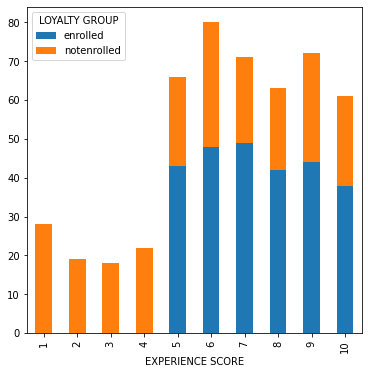

In [66]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

Customers with experience scores below 5 (1 - 4) did not enroll at all. However, customers with scores 5 or more are likely to enroll. So, knowing a customer’s experience score can predict the likelihood of a customer enrolling. If a customer has a score below 5 score, then they are not likely to enroll at all. However, if their experience score is 5 or more, they are likely to join with a probability of 60% - 70%.

#### Marital Status

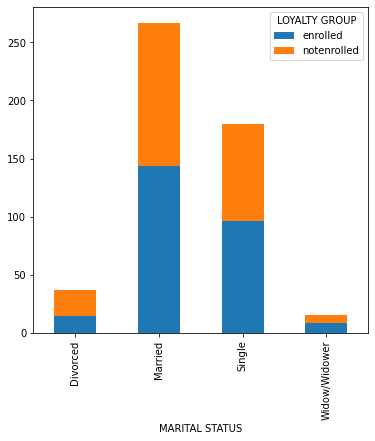

In [67]:
table=pd.crosstab(customer_all_view['MARITAL STATUS'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

Apparently, marital status does not have much effect on loyalty enrollment. The ratio of enrolled to non-enrolled appears to be almost the same for all marital statuses, especially for married and singles (who are most of Retailer X’s customer base).

#### Age

In [68]:
customer_all_view['AGE_BINNED'] = pd.cut(customer_all_view['AGE'],10) # 10 bins of age

In [69]:
customer_all_view['AGE_BINNED'].value_counts()

(32.4, 39.6]      94
(39.6, 46.8]      91
(25.2, 32.4]      86
(17.928, 25.2]    78
(46.8, 54.0]      51
(54.0, 61.2]      24
(61.2, 68.4]      23
(82.8, 90.0]      23
(75.6, 82.8]      16
(68.4, 75.6]      14
Name: AGE_BINNED, dtype: int64

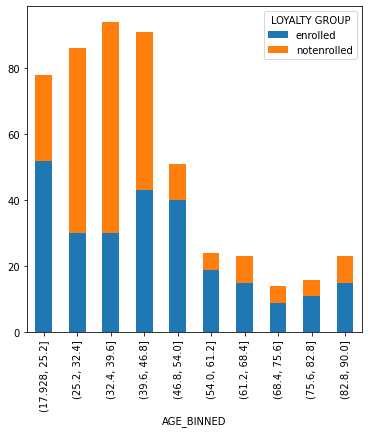

In [70]:
table=pd.crosstab(customer_all_view['AGE_BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

Based on the above chart, middle aged customers are less likely to join loyalty programs, and younger and elderly people are more likely to join. This piece of information reveals that there is some sort of significant relationship between age and loyalty enrollment.

In [71]:
customer_all_view.groupby("LOYALTY GROUP").agg({'AGE':'mean'})

,AGE
LOYALTY GROUP,
enrolled,44.723485
notenrolled,39.622881


Based on the results, you can say that enrolled customers have a slightly higher average age than their non-enrolled counterparts.

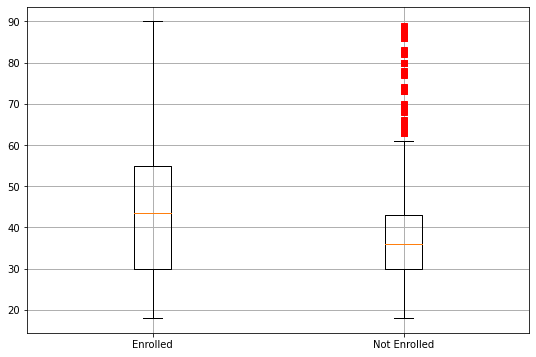

In [72]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plot1=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == "enrolled"]
plot2=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == "notenrolled"]
list1=[plot1,plot2]
ax.boxplot(list1,0,'rs',1)
ax.set_xticklabels(['Enrolled', 'Not Enrolled'])
plt.grid( linestyle='-', linewidth=1)
plt.show()

The distribution of age for enrolled customers is more dispersed than the same for non-enrolled ones. Enrolled customers have a higher median and quartiles, and a bigger IQR range than their non-enrolled counterparts.

The chart shows that 75% of customers that are enrolled in the loyalty program are below the age of 55, and 75% of non-enrolled customers are below the age of 43.

#### Total Spend

In [73]:
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['TOTAL SPENT'],10) # 10 bins of age

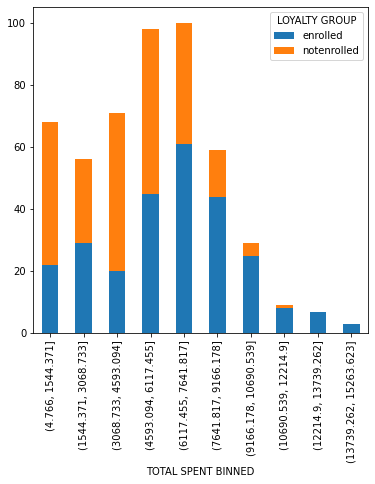

In [74]:
table=pd.crosstab(customer_all_view['TOTAL SPENT BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

The graph shows that as the total spend of customer increase, so does their chances of enrollment as well.

## Bivariate Analysis (2-variable analysis) – Customer spend as a target variable 

#### Age

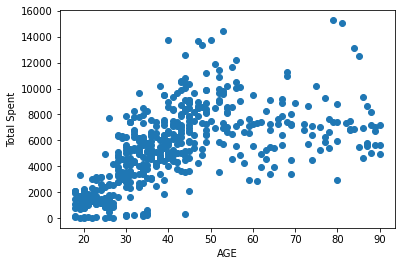

In [75]:
plt.scatter(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])
plt.xlabel("AGE")
plt.ylabel("Total Spent")
plt.show()

There is some positive correlation between both variables, that is, the total spend of a customer increases as their age increases.

In [76]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])

(0.5760170677259272, 1.560821750277651e-45)

The correlation coefficient is 0.576, which implies a moderately strong correlation between both factors.

#### Income

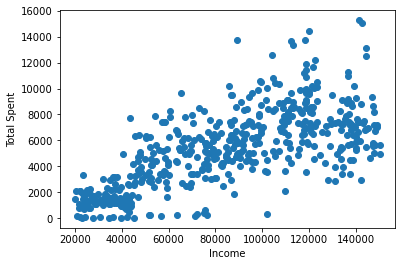

In [77]:
plt.scatter(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.show()

In [78]:
pearsonr(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])

(0.688031108462512, 2.3226326963803363e-71)

Income has a higher correlation coefficient than age, which indicates that it has a strong relationship with customer spending. This finding is logical: Anyone would expect that customer spending is heavily dependent on their income.

#### Experience Score

In [79]:
table = customer_all_view.groupby(['EXPERIENCE SCORE']).agg({'TOTAL SPENT':'mean'}).reset_index()

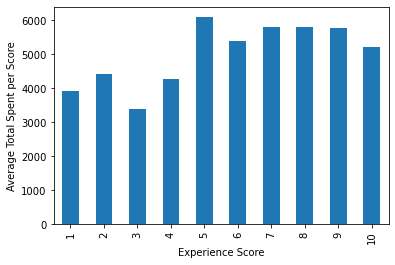

In [80]:
table['TOTAL SPENT'].plot(kind='bar')
plt.xlabel("Experience Score")
plt.ylabel("Average Total Spent per Score")
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])    
plt.show()


Obviously, customers with experience scores 1 - 4 have a relatively lower average spend than customers with higher experience scores (5 - 10). This indicates some sort of relationship between the two variables.